In [1]:
!pip install sklearn

  Using cached sklearn-0.0.post11-py3-none-any.whl


In [2]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Load the TF-IDF data from CSV files
train_df = pd.read_csv('train_tfidf.csv')
test_df = pd.read_csv('test_tfidf.csv')

# Concatenate the dataframes along rows to merge them
combined_features = pd.concat([train_df, test_df], axis=0, ignore_index=True)

In [5]:
combined_features.drop(combined_features.columns[0], axis=1, inplace=True)

In [6]:
combined_features

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.180286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29996,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29997,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29998,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
combined_labels = pd.concat([pd.read_csv('train_labels.csv'), pd.read_csv('test_labels.csv')], axis=0, ignore_index=True)

In [8]:
combined_labels

,class
0,non-suicide
1,non-suicide
2,non-suicide
3,suicide
4,non-suicide
...,...
29995,non-suicide
29996,non-suicide
29997,non-suicide
29998,suicide


/Users/medhahira/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/medhahira/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/medhahira/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/medhahira/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

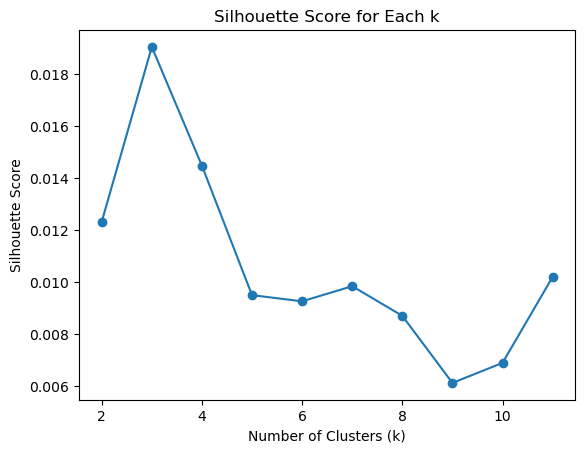

Optimal k value: 3


In [12]:
tfidf_matrix = combined_features.values

# Choose a range of k values to evaluate
k_values = range(2,12) 

# Initialize an empty list to store silhouette scores
silhouette_scores = []

# Iterate over each k value and run k-means clustering
for k in k_values:
    # Fit the k-means model
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_matrix)
    
    # Get cluster labels
    cluster_labels = kmeans.labels_
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(tfidf_matrix, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores to visualize the optimal k
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Each k')
plt.show()

# Identify the optimal k value with the highest silhouette score
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal k value: {optimal_k}")

In [13]:
# Now, run k-means clustering with the optimal k
final_kmeans = KMeans(n_clusters=5, random_state=42, n_init = 'auto')
final_kmeans.fit(tfidf_matrix)

# Get cluster labels for each document
cluster_labels = final_kmeans.labels_

# Optionally, you can print the cluster assignments for each document
for i, label in enumerate(cluster_labels):
    print(f"Document {i + 1}: Cluster {label + 1}")

Document 1: Cluster 3
Document 2: Cluster 3
Document 3: Cluster 3
Document 4: Cluster 3
Document 5: Cluster 3
Document 6: Cluster 3
Document 7: Cluster 3
Document 8: Cluster 2
Document 9: Cluster 3
Document 10: Cluster 4
Document 11: Cluster 3
Document 12: Cluster 3
Document 13: Cluster 3
Document 14: Cluster 3
Document 15: Cluster 3
Document 16: Cluster 5
Document 17: Cluster 5
Document 18: Cluster 3
Document 19: Cluster 2
Document 20: Cluster 3
Document 21: Cluster 1
Document 22: Cluster 3
Document 23: Cluster 3
Document 24: Cluster 3
Document 25: Cluster 3
Document 26: Cluster 4
Document 27: Cluster 4
Document 28: Cluster 3
Document 29: Cluster 2
Document 30: Cluster 4
Document 31: Cluster 4
Document 32: Cluster 1
Document 33: Cluster 2
Document 34: Cluster 3
Document 35: Cluster 2
Document 36: Cluster 3
Document 37: Cluster 3
Document 38: Cluster 3
Document 39: Cluster 3
Document 40: Cluster 3
Document 41: Cluster 3
Document 42: Cluster 4
Document 43: Cluster 3
Document 44: Cluster

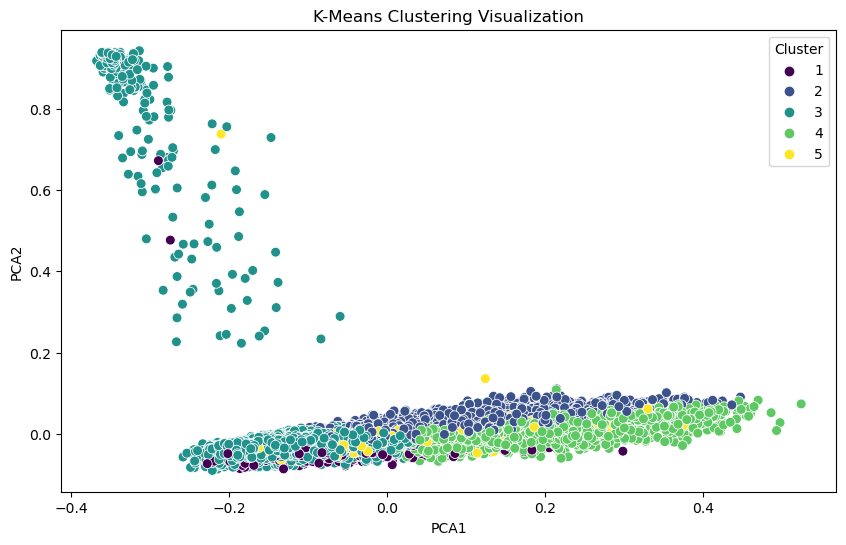

In [14]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce dimensionality using PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(tfidf_matrix)

# Add the cluster labels to the reduced features
reduced_df = pd.DataFrame(reduced_features, columns=['PCA1', 'PCA2'])
reduced_df['Cluster'] = cluster_labels + 1  # Adding 1 to start clusters from 1

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=reduced_df, palette='viridis', s=50)
plt.title('K-Means Clustering Visualization')
plt.show()


In [15]:
# Now, run k-means clustering with the optimal k
final_kmeans = KMeans(n_clusters=3, random_state=42, n_init = 'auto')
final_kmeans.fit(tfidf_matrix)

# Get cluster labels for each document
cluster_labels = final_kmeans.labels_

# Optionally, you can print the cluster assignments for each document
for i, label in enumerate(cluster_labels):
    print(f"Document {i + 1}: Cluster {label + 1}")

Document 1: Cluster 1
Document 2: Cluster 1
Document 3: Cluster 1
Document 4: Cluster 1
Document 5: Cluster 1
Document 6: Cluster 1
Document 7: Cluster 1
Document 8: Cluster 2
Document 9: Cluster 1
Document 10: Cluster 2
Document 11: Cluster 1
Document 12: Cluster 1
Document 13: Cluster 1
Document 14: Cluster 1
Document 15: Cluster 1
Document 16: Cluster 3
Document 17: Cluster 3
Document 18: Cluster 1
Document 19: Cluster 2
Document 20: Cluster 1
Document 21: Cluster 1
Document 22: Cluster 1
Document 23: Cluster 1
Document 24: Cluster 1
Document 25: Cluster 1
Document 26: Cluster 2
Document 27: Cluster 2
Document 28: Cluster 1
Document 29: Cluster 2
Document 30: Cluster 2
Document 31: Cluster 2
Document 32: Cluster 1
Document 33: Cluster 3
Document 34: Cluster 1
Document 35: Cluster 2
Document 36: Cluster 1
Document 37: Cluster 1
Document 38: Cluster 1
Document 39: Cluster 1
Document 40: Cluster 1
Document 41: Cluster 1
Document 42: Cluster 2
Document 43: Cluster 1
Document 44: Cluster

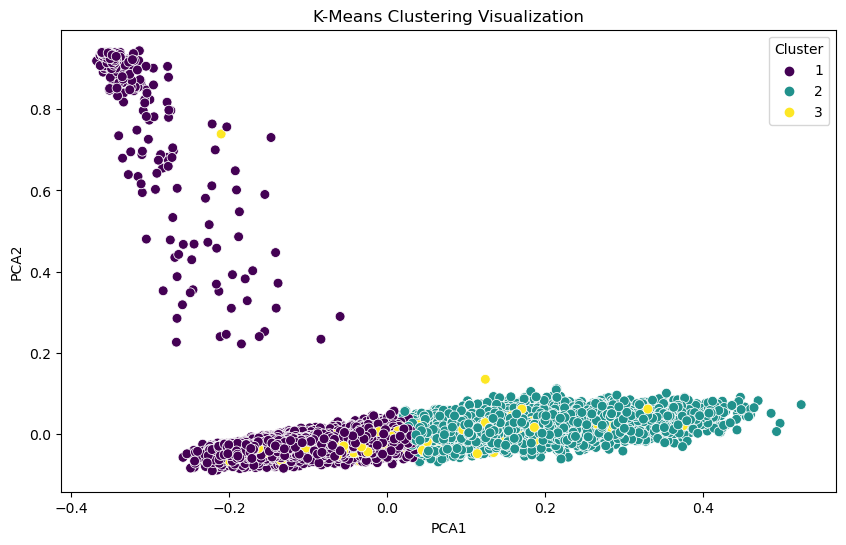

In [16]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce dimensionality using PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(tfidf_matrix)

# Add the cluster labels to the reduced features
reduced_df = pd.DataFrame(reduced_features, columns=['PCA1', 'PCA2'])
reduced_df['Cluster'] = cluster_labels + 1  # Adding 1 to start clusters from 1

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=reduced_df, palette='viridis', s=50)
plt.title('K-Means Clustering Visualization')
plt.show()
